# Упражнение 2.1

Подключим требуемые библиотеки.

In [70]:
import csv
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn import datasets
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

In [71]:
from google.colab import drive
drive.mount('/content/drive')
path = r'/content/drive/MyDrive/Colab Notebooks/week2/7_36.csv'
X = pd.read_csv(path, header=None)
X.info()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       60 non-null     float64
 1   1       60 non-null     float64
 2   2       60 non-null     float64
 3   3       60 non-null     float64
 4   4       60 non-null     float64
 5   5       60 non-null     float64
 6   6       60 non-null     float64
 7   7       60 non-null     float64
 8   8       60 non-null     float64
 9   9       60 non-null     float64
dtypes: float64(10)
memory usage: 4.8 KB


## 1,2

In [72]:
pca = PCA(n_components=2, svd_solver='full') 
X_transformed = pca.fit(X).transform(X) 
X_transformed[0]

array([-14.27903089, -16.39322252])

## 3 Найдем долю объясненной дисперсии в зависимости от количества используемых ГК.

In [73]:
explained_variance = np.round(np.cumsum(pca.explained_variance_ratio_),3)
explained_variance

array([0.365, 0.654])

## 4

In [74]:
pca = PCA(n_components=10, svd_solver='auto')
X_full = pca.fit(X).transform(X)
explained_variance = np.round(np.cumsum(pca.explained_variance_ratio_),3)
explained_variance

array([0.365, 0.654, 0.874, 0.945, 0.994, 0.996, 0.997, 0.999, 0.999,
       1.   ])

## 5

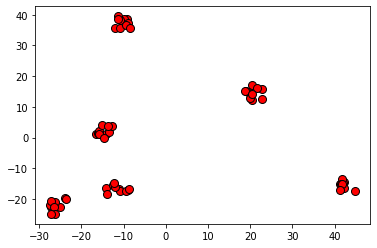

In [75]:
plt.plot(X_transformed[:60, 0], X_transformed[:60, 1], 'o', markerfacecolor='red', markeredgecolor='k', markersize=8)


# Упражнение 2.2

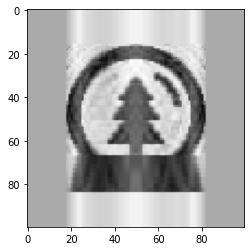

In [77]:
scores = np.genfromtxt('/content/X_reduced_401.csv', delimiter=';') 
loadings = np.genfromtxt('/content/X_loadings_401.csv', delimiter=';') 
values = np.dot(scores,loadings.T) 
plt.imshow(values, cmap='Greys_r')